In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta, datetime

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# 1st Scenario

In [4]:
# given mean trip duration
mean_trip = 100
# assumed standard deviation
std_trip = 20
# number of trips
n_trip = 10000
# % RPC lost
shrinkage_rate = 0.1 
# replication
np.random.seed(42)

In [ ]:
# simulate a trip duration with normal distribution
sim = np.random.normal(mean_trip, std_trip, n_trip)

(array([  1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   3.,   3.,   0.,
          4.,   7.,  11.,   4.,   8.,  10.,  10.,  14.,  20.,  11.,  28.,
         34.,  42.,  45.,  49.,  59.,  76.,  60.,  81., 110., 103., 144.,
        120., 146., 159., 175., 204., 199., 245., 233., 235., 276., 277.,
        273., 298., 303., 315., 285., 336., 311., 301., 317., 299., 296.,
        292., 276., 260., 266., 226., 212., 181., 190., 188., 160., 162.,
        125., 126., 106.,  93.,  99.,  83.,  60.,  50.,  47.,  39.,  47.,
         34.,  19.,  20.,  16.,  15.,  15.,  10.,   7.,   8.,   2.,   6.,
          2.,   7.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 21.55199497,  23.12172256,  24.69145015,  26.26117774,
         27.83090533,  29.40063293,  30.97036052,  32.54008811,
         34.1098157 ,  35.67954329,  37.24927088,  38.81899848,
         40.38872607,  41.95845366,  43.52818125,  45.09790884,
         46.66763643,  48.23736403,  49.80709162,  51.37681921

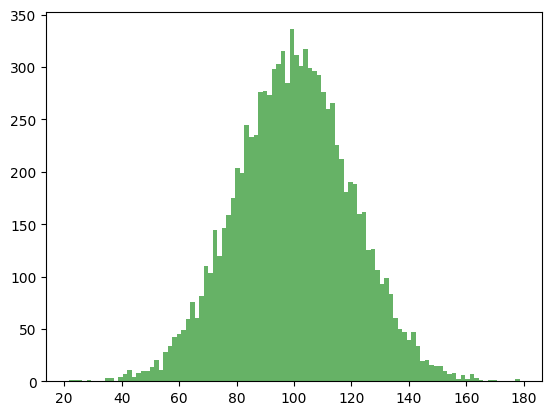

In [ ]:
plt.hist(sim, bins=100, alpha=0.6, color='g')

(array([  1.,   1.,   2.,   0.,   2.,   3.,   0.,   3.,   1.,   0.,   5.,
          7.,  11.,   0.,  16.,  24.,   0.,  26.,  25.,   0.,  39.,  50.,
         67.,   0.,  86.,  79.,   0., 131., 136.,   0., 135., 165., 205.,
          0., 232., 243.,   0., 282., 293.,   0., 309., 329., 379.,   0.,
        360., 387.,   0., 373., 405.,   0., 474., 395., 403.,   0., 382.,
        378.,   0., 356., 313.,   0., 326., 276., 258.,   0., 204., 215.,
          0., 180., 162.,   0., 148., 118.,  97.,   0., 108.,  62.,   0.,
         73.,  50.,   0.,  35.,  38.,  38.,   0.,  25.,  17.,   0.,  12.,
         11.,   0.,   6.,   9.,   3.,   0.,   4.,   6.,   0.,   4.,   1.,
          1.]),
 array([ 65. ,  65.7,  66.4,  67.1,  67.8,  68.5,  69.2,  69.9,  70.6,
         71.3,  72. ,  72.7,  73.4,  74.1,  74.8,  75.5,  76.2,  76.9,
         77.6,  78.3,  79. ,  79.7,  80.4,  81.1,  81.8,  82.5,  83.2,
         83.9,  84.6,  85.3,  86. ,  86.7,  87.4,  88.1,  88.8,  89.5,
         90.2,  90.9,  91.6,  92.3

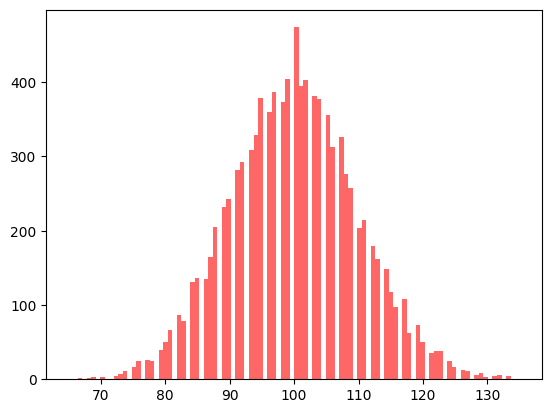

In [ ]:
# simulating a trip duration with poisson distribution
sim_p = np.random.poisson(100,10000)

plt.hist(sim_p, bins=100, alpha=0.6, color='r')

In [ ]:
# see the min and max values of the two distributions
print(sim.min(),
sim.max())
print(sim_p.min(),
sim_p.max())

21.55199496763315 178.52475412872653
65 135


In [ ]:
print(start_date)
print(rental_dates[:10])


2020-01-01 00:00:00
[datetime.datetime(2022, 9, 15, 0, 0), datetime.datetime(2020, 6, 20, 0, 0), datetime.datetime(2021, 11, 5, 0, 0), datetime.datetime(2022, 3, 7, 0, 0), datetime.datetime(2020, 8, 31, 0, 0), datetime.datetime(2021, 2, 24, 0, 0), datetime.datetime(2021, 1, 13, 0, 0), datetime.datetime(2020, 12, 6, 0, 0), datetime.datetime(2022, 8, 11, 0, 0), datetime.datetime(2021, 11, 1, 0, 0)]


In [ ]:
# randomly create a list with the lost assets
is_lost = np.random.rand(n_trip) < shrinkage_rate
return_dates = [
    rental_dates[i] + timedelta(days=int(sim_p[i])) if not is_lost[i] else None
    for i in range(n_trip)
]

In [11]:
# Create a DataFrame
data = pd.DataFrame({
    "rental_date": rental_dates,
    "return_date": return_dates,
    "is_lost": is_lost
})

data['n_days'] = (data['return_date'] - data['rental_date']).dt.days
data['sim_p'] = sim_p

data.head()

,rental_date,return_date,is_lost,n_days,sim_p
0,2022-09-15,2022-12-19,False,95.0,95
1,2020-06-20,2020-09-10,False,82.0,82
2,2021-11-05,2022-02-15,False,102.0,102
3,2022-03-07,2022-06-10,False,95.0,95
4,2020-08-31,2020-12-03,False,94.0,94


In [12]:
data.loc[data.is_lost == True]

,rental_date,return_date,is_lost,n_days,sim_p
13,2020-07-06,NaT,True,NaN,107
17,2022-04-16,NaT,True,NaN,108
18,2021-08-13,NaT,True,NaN,89
23,2021-06-19,NaT,True,NaN,82
26,2021-10-20,NaT,True,NaN,115
...,...,...,...,...,...
9976,2020-02-04,NaT,True,NaN,99
9977,2022-06-13,NaT,True,NaN,114
9980,2020-07-02,NaT,True,NaN,107
9992,2022-03-07,NaT,True,NaN,109


In [13]:
sum(data['is_lost']==False) 

9025

## Shrinkage estimator

In [14]:
from lifelines import KaplanMeierFitter

In [15]:
# Prepare survival data
data['trip_completed'] = data['return_date'].notnull()  # 1 if returned, 0 if lost
data['trip_duration'] = (data['return_date'] - data['rental_date']).dt.days
data['trip_duration'].fillna(data['trip_duration'].max(), inplace=True)  # Handle NaN for lost RPCs

(array([  13.,  105.,  535., 1388., 2328., 2415., 1470.,  584.,  158.,
        1004.]),
 array([ 65.,  72.,  79.,  86.,  93., 100., 107., 114., 121., 128., 135.]),
 <BarContainer object of 10 artists>)

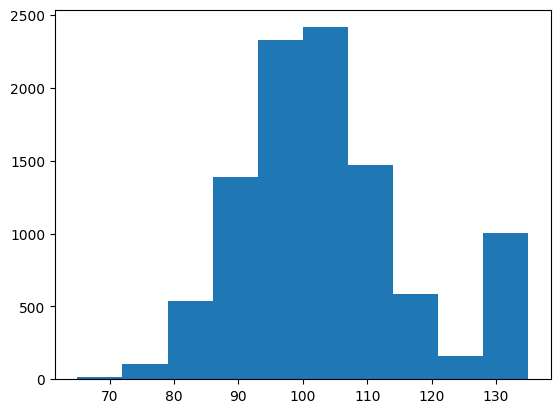

In [16]:
plt.hist(data['trip_duration'])

In [17]:
# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['trip_duration'], event_observed=data['trip_completed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10000 total observations, 975 right-censored observations>

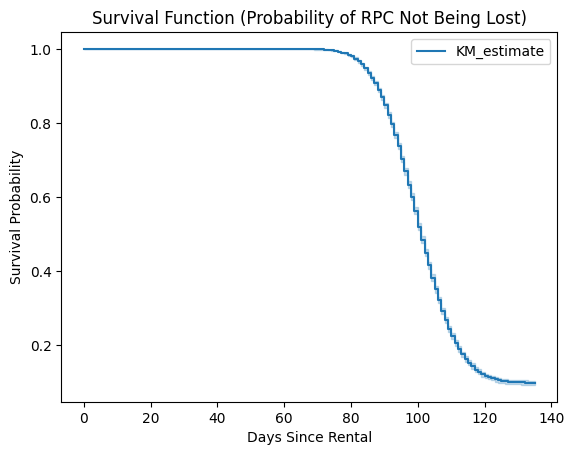

In [22]:
# Plot survival curve
kmf.plot_survival_function()
# kmf.survival_function_
plt.title('Survival Function (Probability of RPC Not Being Lost)')
plt.xlabel('Days Since Rental')
plt.ylabel('Survival Probability')
plt.show()

In [24]:
kmf.median_survival_time_

print(kmf.survival_function_)

          KM_estimate
timeline             
0.0            1.0000
65.0           0.9999
66.0           0.9998
67.0           0.9996
68.0           0.9994
...               ...
131.0          0.0985
132.0          0.0980
133.0          0.0977
134.0          0.0976
135.0          0.0975

[72 rows x 1 columns]


In [48]:
# Shrinkage rate at day n
DAY = 100 # change this value to see the shrinkage rate at different days
day_n_survival = kmf.survival_function_at_times(DAY).values[0]
day_n_survival
shrinkage_rate_at_n = 1 - day_n_survival
print(f"Shrinkage rate at day {DAY}: {shrinkage_rate_at_n:.4f}")


Shrinkage rate at day 100: 0.4801


## Pool size

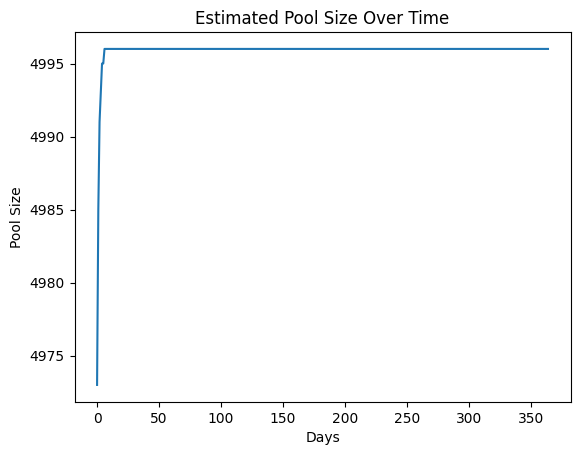

In [46]:
# Parameters for simulation
initial_pool_size = 5000  # Starting number of RPCs
rental_rate = 50  # Number of RPCs rented out each day
days_to_simulate = 365  # Number of days to simulate (1 year)

# Simulate assets rented out and returned over time
available_assets = initial_pool_size
assets_out = 0
assets_returned = 0
shrinkage_rate = 0.1  # Shrinkage rate: 10% of assets don't return

# Create a list to store the pool size over time
pool_sizes = []

for day in range(days_to_simulate):
    # Simulate number of assets rented out (could be a random number or fixed rate)
    rented_today = rental_rate
    assets_out += rented_today
    
    # Simulate the number of assets returning (based on survival probabilities)
    # Let's assume average trip duration is 100 days, using the Kaplan-Meier survival function.
    # For simplicity, we'll assume all assets rented 100 days ago have returned.
    return_probability = kmf.survival_function_at_times(100).values[0]  # Survival at 100 days
    returned_today = int(assets_out * return_probability)
    
    # Simulate shrinkage (number of assets that don't return)
    lost_today = int(assets_out * (1 - return_probability) * shrinkage_rate)
    
    # Update the pool size
    available_assets = initial_pool_size + returned_today - rented_today - lost_today
    pool_sizes.append(available_assets)
    
    # Update the number of assets out (subtract the ones that have returned)
    assets_out -= returned_today

# Plot the pool size over time
plt.plot(pool_sizes)
plt.title("Estimated Pool Size Over Time")
plt.xlabel("Days")
plt.ylabel("Pool Size")
plt.show()


In [ ]:
# stable pool size after 5 days
pool_sizes[0:10]

[4973, 4985, 4991, 4993, 4995, 4995, 4996, 4996, 4996, 4996]